## Multi-layer coated mirror
A single mirror with multi-layer coating is illustrated here. The reflection and transmission coefficients for s- and p- polarized components are cross-checked with the analysis from `ZEMAX` Optical Studio program.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
S = pap.Source(100, Clear=100)                                  # Source for ray analysis
Sd = pap.Source(20, Clear=100)                                  # Source for ray analysis
S.Wavelength = 0.633
Sd.Wavelength = 0.633
CustomCoat = pap.Coating([2.16-7.18j, 1.67, 1.2, 1.67, 1.2], 
                        [0.100, 0.100, 0.100, 0.100, 0.100])    # Define coating
#
M1 = pap.Surface(200, Mirror=True, n2=2.16-7.18j)               # Mirror substrate
M1.rotateAboutX(45)                                             # Fold the mirror
M1.translateOrigin(z=1000)                                      # Move the mirror
M1.Coating = CustomCoat                                         # Apply coating to M1
#
D = pap.Detector(100)
D.rotateAboutX(90)                                              # Rotate the detector
D.translateOrigin(y=1000, z=1000)                               # Move the detector

In [3]:
Sys = pap.System(S, [M1], D, dRays=Sd)                          # Complete optical system
Sys.propagateRays()                                             # Propagate rays through system

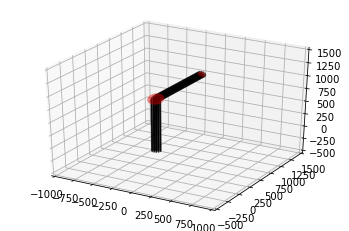

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                    # Draw optical system
pap.adjustAspect(Ax, 2000, y=500, z=500)                        # Adjust 3D space 
plt.show()

In [5]:
MM, Tra = Sys.getSystemMuellerMatrix()                          # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000 -0.07754  0.00000  0.00000]
 [-0.07754  1.00000 -0.00000  0.00000]
 [ 0.00000 -0.00000 -0.88864  0.45200]
 [ 0.00000 -0.00000 -0.45200 -0.88864]]
Throughput is:  0.6051645828331274
